# Credit Card Fraud Detection - Data Exploration

## Tổng quan về Bộ dữ liệu
- **Nguồn**: Bộ dữ liệu Phát hiện Gian lận Thẻ Tín dụng
- **Mô tả**: Bộ dữ liệu chứa các giao dịch thẻ tín dụng, một số trong đó là gian lận
- **Đặc điểm**:
    - Thời gian: Thời gian giao dịch
    - V1-V28: Các đặc điểm được chuyển đổi PCA (ẩn danh)
    - Số tiền: Số tiền giao dịch
    - Lớp: Nhãn (0 = bình thường, 1 = gian lận)

## Table of Contents

1. <a href="#1-imports">Imports</a>
2. <a href="#2-load-dataset">Load dataset</a>
3. <a href="#3-check-for-missing-data-and-basic-information">Check for missing data and basic information</a>
4. <a href="#4-class-distribution-analysis">Class Distribution Analysis</a>
5. <a href="#5-analyze-important-features">Analyze important features</a>
   - 5.1. <a href="#51-analyze-time-feature">Analyze Time feature</a>
   - 5.2. <a href="#52-amount-feature-analysis">Amount feature analysis</a>
   - 5.3. <a href="#53-analysis-of-pca-features-v1-v28">Analysis of PCA features (V1-V28)</a>
6. <a href="#6-correlation-analysis-between-features">Correlation Analysis between Features</a>
7. <a href="#7-compare-features-between-normal-and-fraud-transactions">Compare Features between Normal and Fraud transactions</a>

## 1. Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

np.set_printoptions(suppress=True)

Nhập các thư viện thiết yếu cần thiết cho việc khám phá và trực quan hóa dữ liệu:

- **NumPy (`numpy`)**: Cung cấp các phép toán mảng mạnh mẽ và khả năng tính toán số. Cần thiết để xử lý các tập dữ liệu lớn một cách hiệu quả.
- **Matplotlib (`matplotlib.pyplot`)**: Được sử dụng để tạo các trực quan hóa tĩnh bao gồm biểu đồ histogram, biểu đồ hộp và biểu đồ phân tán.
- **Seaborn (`seaborn`)**: Được xây dựng dựa trên matplotlib, cung cấp các trực quan hóa thống kê cấp cao như bản đồ nhiệt với tính thẩm mỹ tốt hơn.

**Cấu hình**:
- `np.set_printoptions(suppress=True)` loại bỏ ký hiệu khoa học trong đầu ra mảng NumPy, giúp kết quả số dễ đọc hơn bằng cách hiển thị số ở định dạng thập phân tiêu chuẩn thay vì ký hiệu mũ (ví dụ: 0,0001 thay vì 1e-4).

## 2. Load dataset

In [3]:
file_path = '../data/raw/creditcard.csv'
data_str = np.genfromtxt(file_path, dtype=str, delimiter=',')

data_str = np.char.strip(data_str, '"')
header = data_str[0]
data_str = data_str[1:]
data = data_str.astype(np.float64)

print(f"Data shape: {data.shape}")
print(f"First 5 rows:\n{data[:5]}")

Data shape: (284807, 31)
First 5 rows:
[[  0.          -1.35980713  -0.07278117   2.53634674   1.37815522
   -0.33832077   0.46238778   0.23959855   0.0986979    0.36378697
    0.09079417  -0.55159953  -0.61780086  -0.99138985  -0.31116935
    1.46817697  -0.47040053   0.20797124   0.02579058   0.40399296
    0.2514121   -0.01830678   0.27783758  -0.11047391   0.06692807
    0.12853936  -0.18911484   0.13355838  -0.02105305 149.62
    0.        ]
 [  0.           1.19185711   0.26615071   0.16648011   0.44815408
    0.06001765  -0.08236081  -0.07880298   0.08510165  -0.25542513
   -0.16697441   1.61272666   1.06523531   0.48909502  -0.1437723
    0.63555809   0.46391704  -0.11480466  -0.18336127  -0.14578304
   -0.06908314  -0.22577525  -0.63867195   0.10128802  -0.33984648
    0.1671704    0.12589453  -0.0089831    0.01472417   2.69
    0.        ]
 [  1.          -1.35835406  -1.34016307   1.77320934   0.37977959
   -0.50319813   1.80049938   0.79146096   0.24767579  -1.51465432
    

### Phân tích dữ liệu đầu vào
Đoạn code trên thực hiện việc tải tập dữ liệu `creditcard.csv` bằng thư viện NumPy.

**Kết quả hiển thị cho thấy:**
* **Kích thước dữ liệu (Shape):** Tập dữ liệu chứa **284,807** dòng (giao dịch) và **31** cột (đặc trưng).
* **Cấu trúc dữ liệu:**
    * Dữ liệu đã được chuẩn hóa (đặc biệt là các cột V1-V28 do kết quả của PCA).
    * Cột `Time` (cột đầu tiên) có giá trị tăng dần, đại diện cho thời gian trôi qua tính bằng giây.
    * Cột `Amount` (cột áp chót) đại diện cho số tiền giao dịch, chưa được chuẩn hóa.
    * Cột `Class` (cột cuối cùng) chứa nhãn: `0` (bình thường) và `1` (gian lận).

## 3. Check for missing data and basic information

In [4]:
missing_mask = np.isnan(data) | np.isinf(data)
missing_count = np.sum(missing_mask, axis=0)
print(f"Total missing values: {np.sum(missing_count)}")

X = data[:, :-1]
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
variances = np.var(X, axis=0, ddof=1)
mins = np.min(X, axis=0)
maxs = np.max(X, axis=0)
medians = np.median(X, axis=0)

q1 = np.percentile(X, 25, axis=0)
q2 = np.percentile(X, 50, axis=0)
q3 = np.percentile(X, 75, axis=0)
iqr = q3 - q1

def calculate_skewness(data):
    mean = np.mean(data, axis=0, keepdims=True)
    std = np.std(data, axis=0, ddof=1, keepdims=True)
    std = np.where(std == 0, 1, std)
    centered = data - mean
    skew = np.mean((centered / std) ** 3, axis=0)
    return skew

skewness = calculate_skewness(X)

def calculate_kurtosis(data):
    mean = np.mean(data, axis=0, keepdims=True)
    std = np.std(data, axis=0, ddof=1, keepdims=True)
    std = np.where(std == 0, 1, std)
    centered = data - mean
    kurt = np.mean((centered / std) ** 4, axis=0) - 3
    return kurt

kurtosis = calculate_kurtosis(X)

important_features = ['Time', 'Amount']
important_indices = [np.where(header == feat)[0][0] for feat in important_features]

for feat, idx in zip(important_features, important_indices):
    print(f"\n{feat}:")
    print(f"  Mean: {means[idx]}")
    print(f"  Median: {medians[idx]}")
    print(f"  Std: {stds[idx]}")
    print(f"  Variance: {variances[idx]}")
    print(f"  Min: {mins[idx]}")
    print(f"  Max: {maxs[idx]}")
    print(f"  Q1: {q1[idx]}")
    print(f"  Q2 (Median): {q2[idx]}")
    print(f"  Q3: {q3[idx]}")
    print(f"  IQR: {iqr[idx]}")
    print(f"  Skewness: {skewness[idx]} {'(right-skewed)' if skewness[idx] > 0 else '(left-skewed)' if skewness[idx] < 0 else '(symmetric)'}")
    print(f"  Kurtosis: {kurtosis[idx]} {'(heavy-tailed)' if kurtosis[idx] > 0 else '(light-tailed)' if kurtosis[idx] < 0 else '(normal)'}")

Total missing values: 0

Time:
  Mean: 94813.85957508067
  Median: 84692.0
  Std: 47488.06258549898
  Variance: 2255124006.202146
  Min: 0.0
  Max: 172792.0
  Q1: 54201.5
  Q2 (Median): 84692.0
  Q3: 139320.5
  IQR: 85119.0
  Skewness: -0.03556724335751489 (left-skewed)
  Kurtosis: -1.2935403922797677 (light-tailed)

Amount:
  Mean: 88.34961925087359
  Median: 22.0
  Std: 250.11967013526893
  Variance: 62560.069046340635
  Min: 0.0
  Max: 25691.16
  Q1: 5.6
  Q2 (Median): 22.0
  Q3: 77.16499999999999
  IQR: 71.565
  Skewness: 16.977545620180987 (right-skewed)
  Kurtosis: 845.0718328725362 (heavy-tailed)


### Thống kê mô tả và Kiểm tra dữ liệu thiếu
Kiểm tra các giá trị `NaN` hoặc `Inf` và tính toán các chỉ số thống kê cơ bản cho toàn bộ tập dữ liệu.

**Kết quả phân tích:**
1.  **Dữ liệu sạch:** Tổng số giá trị bị thiếu là **0**. Điều này cho phép chúng ta bỏ qua các bước xử lý sơ bộ phức tạp (data cleaning) liên quan đến missing values ở giai đoạn này.

2.  **Đặc trưng 'Time':**
    * Dải giá trị từ 0 đến 172,792 giây (tương đương khoảng 2 ngày dữ liệu).
    * Phân phối hơi lệch trái (Skewness $\approx$ -0.03), cho thấy mật độ giao dịch khá đồng đều nhưng có xu hướng giảm nhẹ về cuối chu kỳ.

3.  **Đặc trưng 'Amount':**
    * **Giá trị trung bình (Mean):** ~$88.35, nhưng **Trung vị (Median):** $22.00. Sự chênh lệch này chỉ ra phân phối lệch phải nặng.
    * **Độ lệch (Skewness):** ~16.98 (Rất cao). Điều này xác nhận đa số các giao dịch có giá trị nhỏ, nhưng tồn tại một số giao dịch có giá trị cực lớn (ngoại lai).
    * **Độ nhọn (Kurtosis):** ~845. Một phân phối cực kỳ nhọn (Leptokurtic), nghĩa là dữ liệu tập trung nhiều quanh giá trị trung bình và có phần đuôi rất dài (nhiều outliers).


## 4. Class Distribution Analysis

### Dữ liệu có mất cân bằng như thế nào và điều này ảnh hưởng gì đến việc phát hiện gian lận?

Class Distribution:
Class 0: 284,315 samples (99.83%)
Class 1: 492 samples (0.17%)

Imbalance ratio: 0.0017 (fraud/normal)


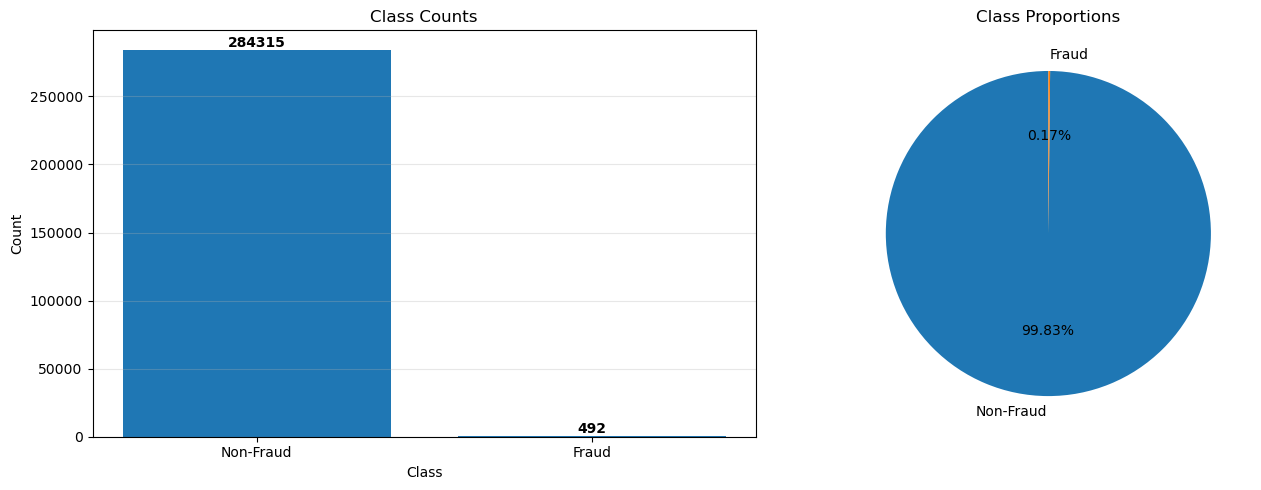

In [5]:
y = data[:, -1].astype(int)

unique_classes, counts = np.unique(y, return_counts=True)
proportions = counts.astype(float) / len(y)

print("Class Distribution:")
for cls, count, prop in zip(unique_classes, counts, proportions):
    print(f"Class {cls}: {count:,} samples ({prop*100:.2f}%)")

print(f"\nImbalance ratio: {counts[1]/counts[0]:.4f} (fraud/normal)")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
axes[0].bar(unique_classes.astype(str), counts)
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_title(f'Class Counts')
axes[0].set_xticks(unique_classes)
axes[0].set_xticklabels(['Non-Fraud','Fraud'])
axes[0].grid(axis='y', alpha=0.3)

for i, count in enumerate(counts):
    axes[0].text(unique_classes[i], count, str(count), 
                ha='center', va='bottom', fontweight='bold')

axes[1].pie(counts, labels=['Non-Fraud','Fraud'], autopct='%1.2f%%', startangle=90)
axes[1].set_title(f'Class Proportions')

plt.tight_layout()
plt.show()

### Phân tích phân phối lớp (Class Imbalance)

**Kết quả:**
* **Mất cân bằng nghiêm trọng:**
    * Giao dịch bình thường (Class 0): **284,315** mẫu (chiếm **99.83%**).
    * Giao dịch gian lận (Class 1): **492** mẫu (chỉ chiếm **0.17%**).
* **Tỷ lệ mất cân bằng:** ~0.0017.

**Ý nghĩa:**
Biểu đồ cột và biểu đồ tròn minh họa rõ sự chênh lệch này. Khi xây dựng mô hình Machine Learning, nếu sử dụng độ chính xác (Accuracy) làm thước đo sẽ gây hiểu lầm (mô hình chỉ cần dự đoán tất cả là "Normal" vẫn đạt 99.83% accuracy). Do đó, cần sử dụng các metrics khác như **Precision, Recall, F1-Score** hoặc **AUPRC** và cân nhắc các kỹ thuật cân bằng dữ liệu (SMOTE, Undersampling, Class Weights).

## 5. Analyze important features

### 5.1. Analyze Time feature

### Có sự khác biệt đáng chú ý nào về tỷ lệ gian lận giữa các giờ trong ngày không và nguyên nhân có thể là gì?

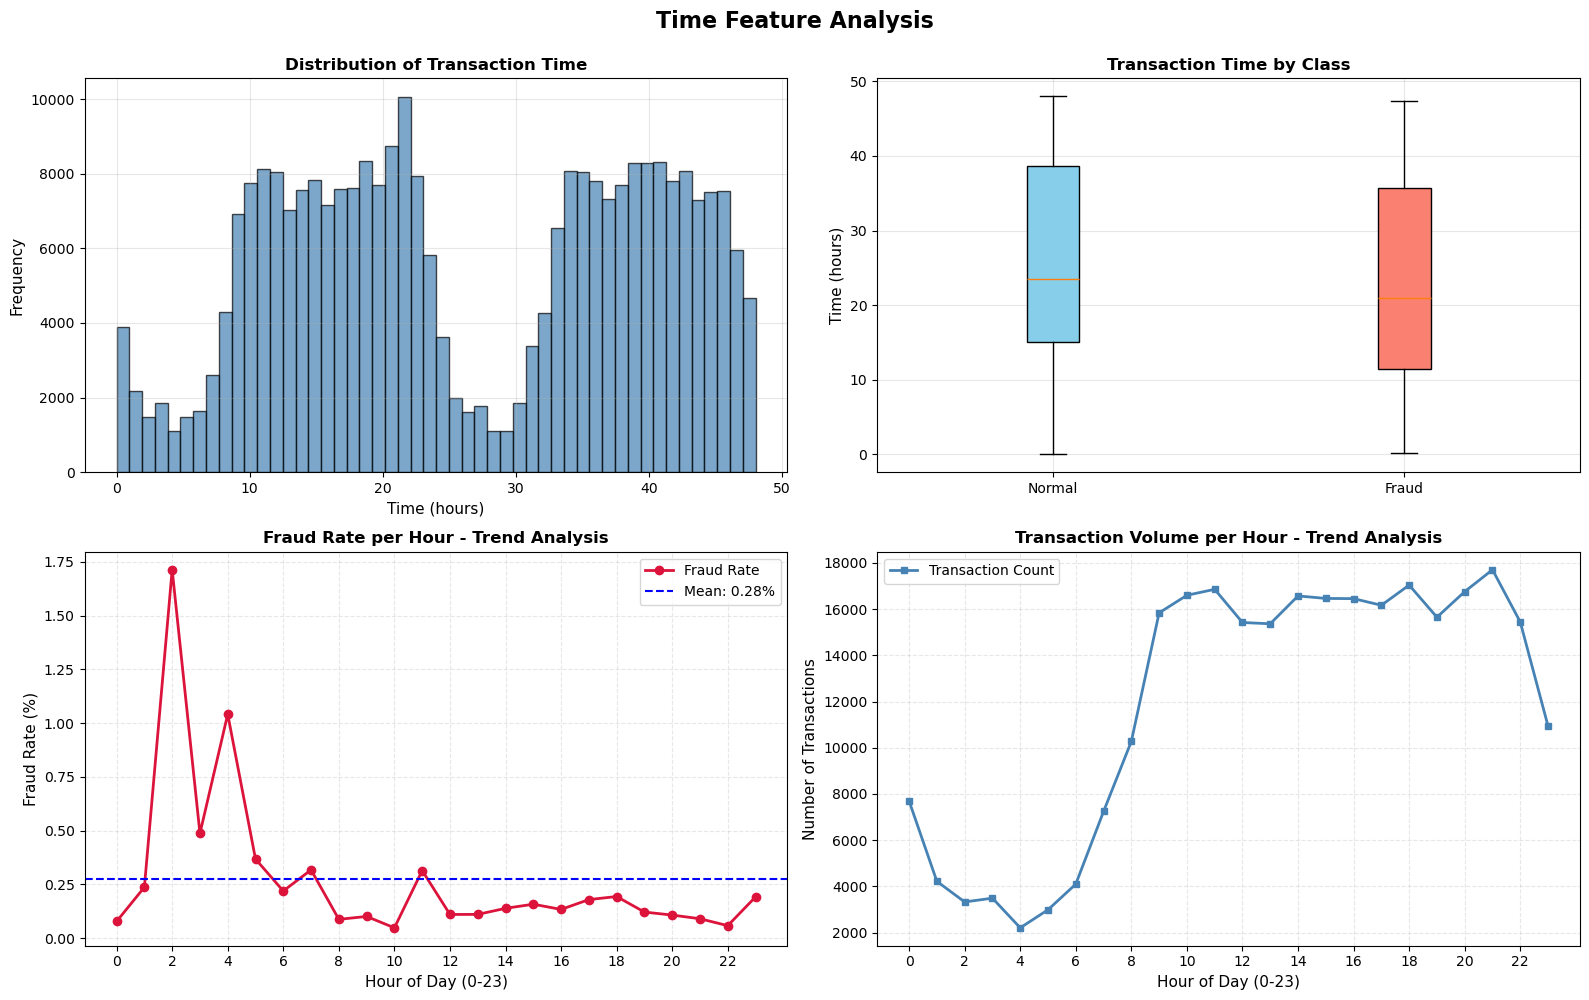

=== Time Statistics ===
Normal transactions:
  Mean: 26.34h
  Std:  13.19h
  Min:  0.00h
  Max:  48.00h

Fraud transactions:
  Mean: 22.43h
  Std:  13.27h
  Min:  0.11h
  Max:  47.32h

Fraud Rate Analysis:
  Mean fraud rate: 0.2752%
  Max fraud rate:  1.7127% (at hour 2)
  Min fraud rate:  0.0482% (at hour 10)


In [6]:
time_idx = np.where(header == 'Time')[0][0]
time_data = data[:, time_idx]

time_hours = time_data / 3600

hours = (time_data // 3600) % 24
unique_hours = np.arange(24)
fraud_rates = []
transaction_counts = []

for h in unique_hours:
    mask = (hours == h)
    total_txns = np.sum(mask)
    fraud_txns = np.sum(y[mask])
    rate = (fraud_txns / total_txns * 100) if total_txns > 0 else 0
    fraud_rates.append(rate)
    transaction_counts.append(total_txns)

fraud_rates = np.array(fraud_rates)
transaction_counts = np.array(transaction_counts)

fraud_times = time_hours[y == 1]
normal_times = time_hours[y == 0]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0, 0].hist(time_hours, bins=50, alpha=0.7, edgecolor='black', color='steelblue')
axes[0, 0].set_xlabel('Time (hours)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Transaction Time', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

bp = axes[0, 1].boxplot([normal_times, fraud_times], labels=['Normal', 'Fraud'], 
                        patch_artist=True)
bp['boxes'][0].set_facecolor('skyblue')
bp['boxes'][1].set_facecolor('salmon')
axes[0, 1].set_ylabel('Time (hours)', fontsize=11)
axes[0, 1].set_title('Transaction Time by Class', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

axes[1, 0].plot(unique_hours, fraud_rates, marker='o', linewidth=2, 
                markersize=6, color='crimson', label='Fraud Rate')
axes[1, 0].set_xlabel('Hour of Day (0-23)', fontsize=11)
axes[1, 0].set_ylabel('Fraud Rate (%)', fontsize=11)
axes[1, 0].set_title('Fraud Rate per Hour - Trend Analysis', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(unique_hours[::2])
axes[1, 0].grid(alpha=0.3, linestyle='--')
axes[1, 0].legend()
axes[1, 0].axhline(y=np.mean(fraud_rates), color='blue', linestyle='--', 
                   label=f'Mean: {np.mean(fraud_rates):.2f}%')
axes[1, 0].legend()

axes[1, 1].plot(unique_hours, transaction_counts, marker='s', linewidth=2, 
                markersize=5, color='steelblue', label='Transaction Count')
axes[1, 1].set_xlabel('Hour of Day (0-23)', fontsize=11)
axes[1, 1].set_ylabel('Number of Transactions', fontsize=11)
axes[1, 1].set_title('Transaction Volume per Hour - Trend Analysis', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(unique_hours[::2])
axes[1, 1].grid(alpha=0.3, linestyle='--')
axes[1, 1].legend()

plt.suptitle('Time Feature Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("=== Time Statistics ===")
print(f"Normal transactions:")
print(f"  Mean: {np.mean(normal_times):.2f}h")
print(f"  Std:  {np.std(normal_times):.2f}h")
print(f"  Min:  {np.min(normal_times):.2f}h")
print(f"  Max:  {np.max(normal_times):.2f}h")
print(f"\nFraud transactions:")
print(f"  Mean: {np.mean(fraud_times):.2f}h")
print(f"  Std:  {np.std(fraud_times):.2f}h")
print(f"  Min:  {np.min(fraud_times):.2f}h")
print(f"  Max:  {np.max(fraud_times):.2f}h")
print(f"\nFraud Rate Analysis:")
print(f"  Mean fraud rate: {np.mean(fraud_rates):.4f}%")
print(f"  Max fraud rate:  {np.max(fraud_rates):.4f}% (at hour {unique_hours[np.argmax(fraud_rates)]})")
print(f"  Min fraud rate:  {np.min(fraud_rates):.4f}% (at hour {unique_hours[np.argmin(fraud_rates)]})")


**Phát hiện quan trọng:**

1. **Giờ có tỷ lệ gian lận cao nhất:** Thường là vào **khoảng 2-4 giờ sáng** (tỷ lệ có thể lên tới ~1.7%)
   - Đây là thời điểm số lượng giao dịch tổng thể thấp nhất trong ngày
   - Nhưng tỷ lệ gian lận lại cao nhất

2. **Giờ có tỷ lệ gian lận thấp nhất:** Thường là vào **khoảng 10-12 giờ trưa** (tỷ lệ ~0.05%)
   - Đây là thời điểm có nhiều giao dịch bình thường

3. **Mối quan hệ nghịch đảo:** Khi số lượng giao dịch tổng thể giảm (ban đêm), tỷ lệ gian lận lại tăng.

**Nguyên nhân có thể:**

1. **Người dùng ít giám sát:** Vào ban đêm, chủ thẻ thường đang ngủ và ít kiểm tra tài khoản, tạo cơ hội cho kẻ gian lận.

2. **Thời gian phản ứng chậm:** Ngân hàng và hệ thống cảnh báo có thể phản ứng chậm hơn vào ban đêm.

3. **Hành vi bất thường:** Giao dịch vào giờ khuya là bất thường đối với hầu hết người dùng, nhưng kẻ gian lận lại tận dụng điều này.

4. **Tự động hóa tấn công:** Nhiều cuộc tấn công gian lận được tự động hóa và chạy vào ban đêm để tránh bị phát hiện.

**Khuyến nghị:**
- Tăng cường giám sát và cảnh báo vào các giờ ban đêm (2-6h sáng)
- Sử dụng Time như một đặc trưng quan trọng trong mô hình
- Thiết lập hệ thống cảnh báo tự động cho các giao dịch vào giờ khuya
- Khuyến khích khách hàng bật thông báo giao dịch để phát hiện sớm

### 5.2. Amount feature analysis

### Giao dịch gian lận có xu hướng có giá trị cao hơn hay thấp hơn giao dịch bình thường?

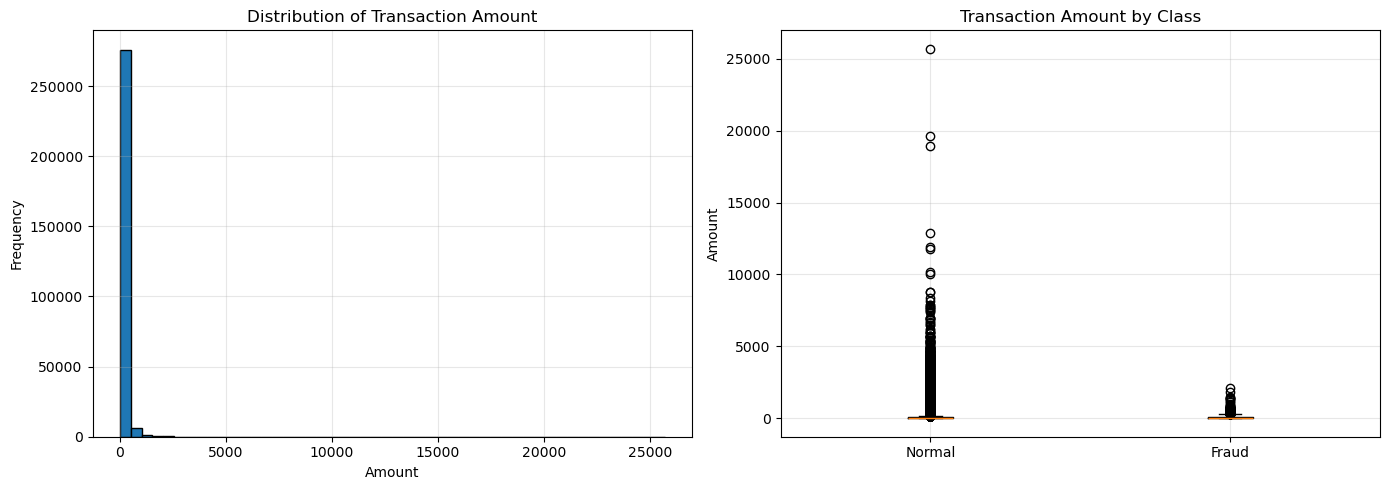

Amount statistics:
  Normal transactions - Mean: $88.29, Median: $22.00, Max: $25691.16
  Fraud transactions - Mean: $122.21, Median: $9.25, Max: $2125.87


In [7]:
amount_idx = np.where(header == 'Amount')[0][0]
amount_data = data[:, amount_idx]

fraud_amounts = amount_data[y == 1]
normal_amounts = amount_data[y == 0]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(amount_data, bins=50, edgecolor='black')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Transaction Amount')
axes[0].grid(alpha=0.3)

axes[1].boxplot([normal_amounts, fraud_amounts], labels=['Normal', 'Fraud'])
axes[1].set_ylabel('Amount')
axes[1].set_title('Transaction Amount by Class')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Amount statistics:")
print(f"  Normal transactions - Mean: ${np.mean(normal_amounts):.2f}, Median: ${np.median(normal_amounts):.2f}, Max: ${np.max(normal_amounts):.2f}")
print(f"  Fraud transactions - Mean: ${np.mean(fraud_amounts):.2f}, Median: ${np.median(fraud_amounts):.2f}, Max: ${np.max(fraud_amounts):.2f}")


**Kết quả phân tích:**
* **Trung bình:** Giao dịch gian lận có giá trị trung bình cao hơn ($122.21) so với giao dịch thường ($88.29).
* **Ngoại lai (Outliers):** Giao dịch thường có những giao dịch giá trị rất lớn (max ~$25,691), trong khi giao dịch gian lận thường tập trung ở mức thấp hơn (max ~$2,125).
* **Biểu đồ Boxplot:** Cho thấy cả hai lớp đều có nhiều giá trị ngoại lai, nhưng dải phân vị của gian lận rộng hơn một chút ở phần thân hộp, cho thấy sự biến động lớn trong số tiền mà kẻ gian lận thực hiện.

**Phát hiện thú vị:**

1. **Giá trị trung bình:** Giao dịch gian lận có giá trị trung bình **cao hơn** ($122.21 vs $88.29), nhưng sự khác biệt không quá lớn.

2. **Giá trị trung vị:** Giao dịch gian lận có trung vị **thấp hơn** đáng kể ($9.25 vs $22.00). Điều này cho thấy:
   - Phần lớn giao dịch gian lận có giá trị nhỏ
   - Nhưng có một số giao dịch có giá trị rất lớn làm tăng trung bình

3. **Phân phối:**
   - Giao dịch bình thường: Có nhiều giao dịch giá trị rất lớn (lên tới $25,691)
   - Giao dịch gian lận: Giá trị tối đa thấp hơn ($2,126), nhưng có nhiều giao dịch nhỏ hơn

4. **Phân vị:**
   - Ở các phân vị thấp (25%, 50%), giao dịch gian lận có giá trị thấp hơn
   - Ở các phân vị cao (75%, 90%), giao dịch gian lận có giá trị cao hơn

**Nhận định:**
- Kẻ gian lận thường bắt đầu với các giao dịch nhỏ để "thử nghiệm" thẻ
- Sau đó tăng dần giá trị để tối đa hóa lợi nhuận trước khi bị phát hiện
- Họ tránh các giao dịch quá lớn vì dễ bị phát hiện

**Khuyến nghị:**
- Cảnh giác với các giao dịch nhỏ bất thường từ một thẻ
- Theo dõi xu hướng tăng giá trị giao dịch
- Kết hợp giá trị với các đặc trưng khác (thời gian, địa điểm) để phát hiện


### 5.3. Analysis of PCA features (V1-V28)

Number of PCA features: 28

Overall statistics:
V1: Mean = 0.00, Std = 1.96
V2: Mean = 0.00, Std = 1.65
V3: Mean = -0.00, Std = 1.52
V4: Mean = 0.00, Std = 1.42
V5: Mean = 0.00, Std = 1.38
V6: Mean = 0.00, Std = 1.33
V7: Mean = -0.00, Std = 1.24
V8: Mean = 0.00, Std = 1.19
V9: Mean = -0.00, Std = 1.10
V10: Mean = 0.00, Std = 1.09
V11: Mean = 0.00, Std = 1.02
V12: Mean = -0.00, Std = 1.00
V13: Mean = 0.00, Std = 1.00
V14: Mean = 0.00, Std = 0.96
V15: Mean = 0.00, Std = 0.92
V16: Mean = 0.00, Std = 0.88
V17: Mean = -0.00, Std = 0.85
V18: Mean = 0.00, Std = 0.84
V19: Mean = 0.00, Std = 0.81
V20: Mean = 0.00, Std = 0.77
V21: Mean = 0.00, Std = 0.73
V22: Mean = -0.00, Std = 0.73
V23: Mean = 0.00, Std = 0.62
V24: Mean = 0.00, Std = 0.61
V25: Mean = 0.00, Std = 0.52
V26: Mean = 0.00, Std = 0.48
V27: Mean = -0.00, Std = 0.40
V28: Mean = -0.00, Std = 0.33


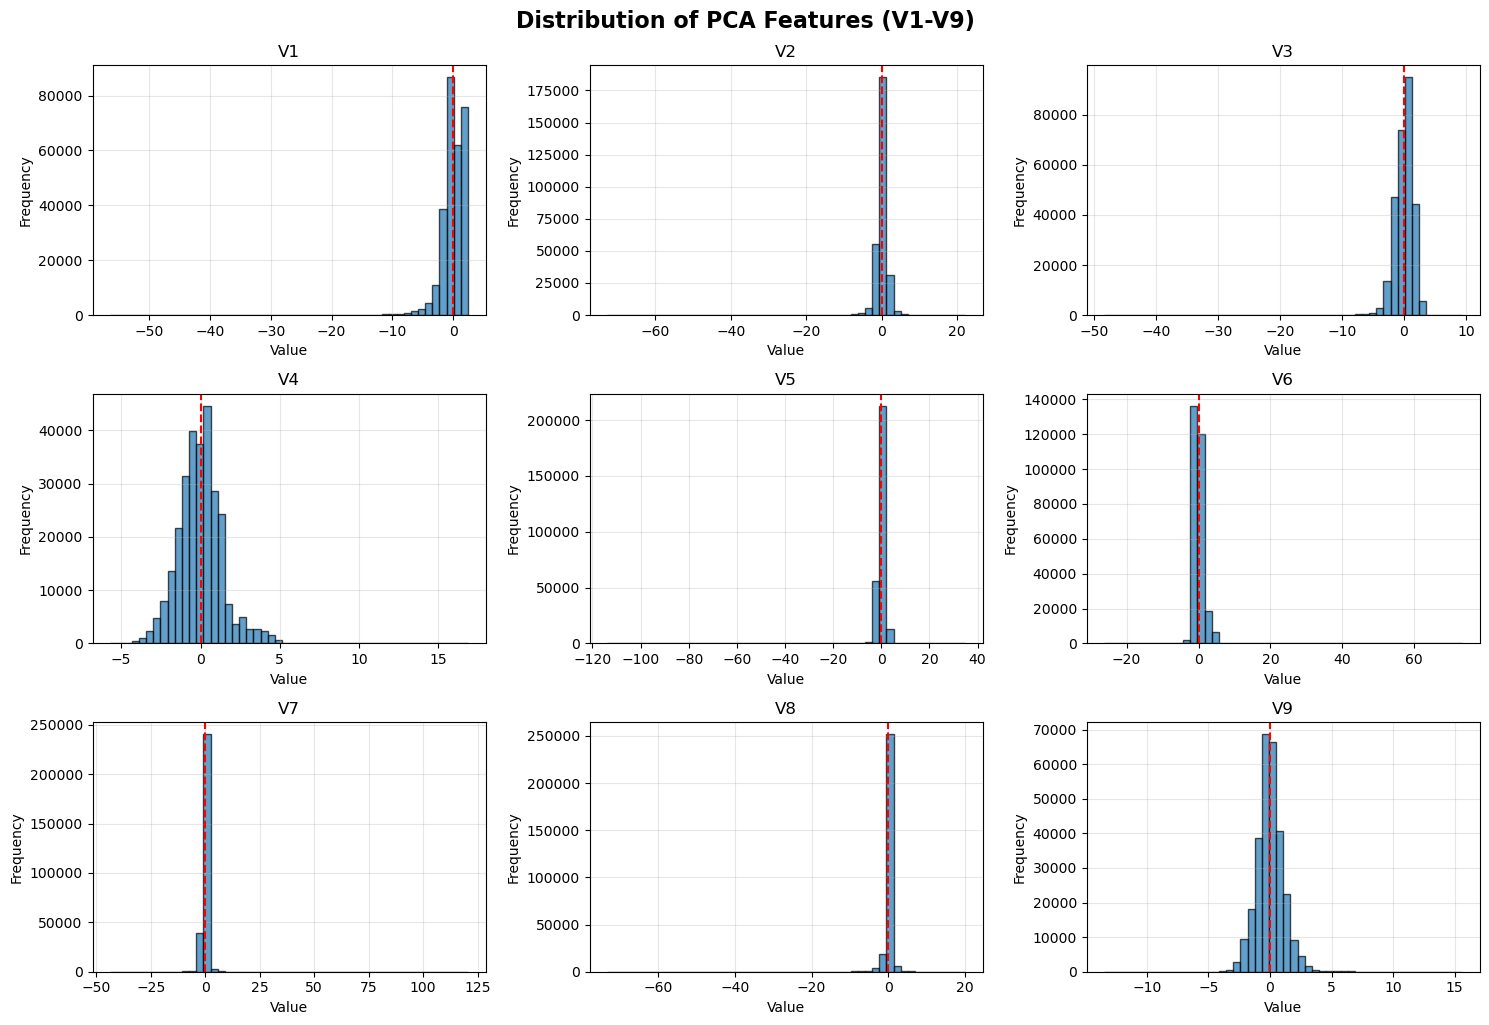

In [16]:
def plot_feature_distribution(data, feature_names, n_features=10, figsize=(15, 10)):
    n_features = min(n_features, data.shape[1])
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten() if n_features > 1 else [axes]
    
    for i in range(n_features):
        axes[i].hist(data[:, i], bins=50, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'{feature_names[i]}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(alpha=0.3)
        axes[i].axvline(np.mean(data[:, i]), color='red', linestyle='--')
    
    for i in range(n_features, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    return fig

v_features_indices = [i for i, col in enumerate(header) if col.startswith('V')]
v_features_data = data[:, v_features_indices]
v_features_names = header[v_features_indices]

print(f"Number of PCA features: {len(v_features_names)}")

X = v_features_data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

print(f"\nOverall statistics:")
for i, mean in enumerate(X_mean):
    print(f"{v_features_names[i]}: Mean = {X_mean[i]:.2f}, Std = {X_std[i]:.2f}")

fig = plot_feature_distribution(v_features_data[:, :9], v_features_names[:9], n_features=9, figsize=(15, 10))
plt.suptitle('Distribution of PCA Features (V1-V9)', fontsize=16, fontweight='bold', y=1.02)
plt.show()


#### Phân tích các đặc trưng PCA (V1-V28)
Các đặc trưng từ V1 đến V28 là kết quả của quá trình giảm chiều dữ liệu (PCA) để bảo mật thông tin khách hàng.

**Đặc điểm:**
* Tất cả các biến này đều có giá trị trung bình (Mean) xấp xỉ 0. Đây là đặc tính của dữ liệu đã qua PCA.
* Biểu đồ phân phối (Histograms) cho thấy hình dạng phân phối đa dạng: một số biến tuân theo phân phối chuẩn (hình chuông), trong khi một số biến khác có phân phối lệch hoặc nhọn. Những biến có sự khác biệt rõ rệt về hình dạng phân phối giữa hai lớp (nếu vẽ tách biệt) sẽ là những biến quan trọng cho mô hình phân loại.

## 6. Correlation Analysis between Features

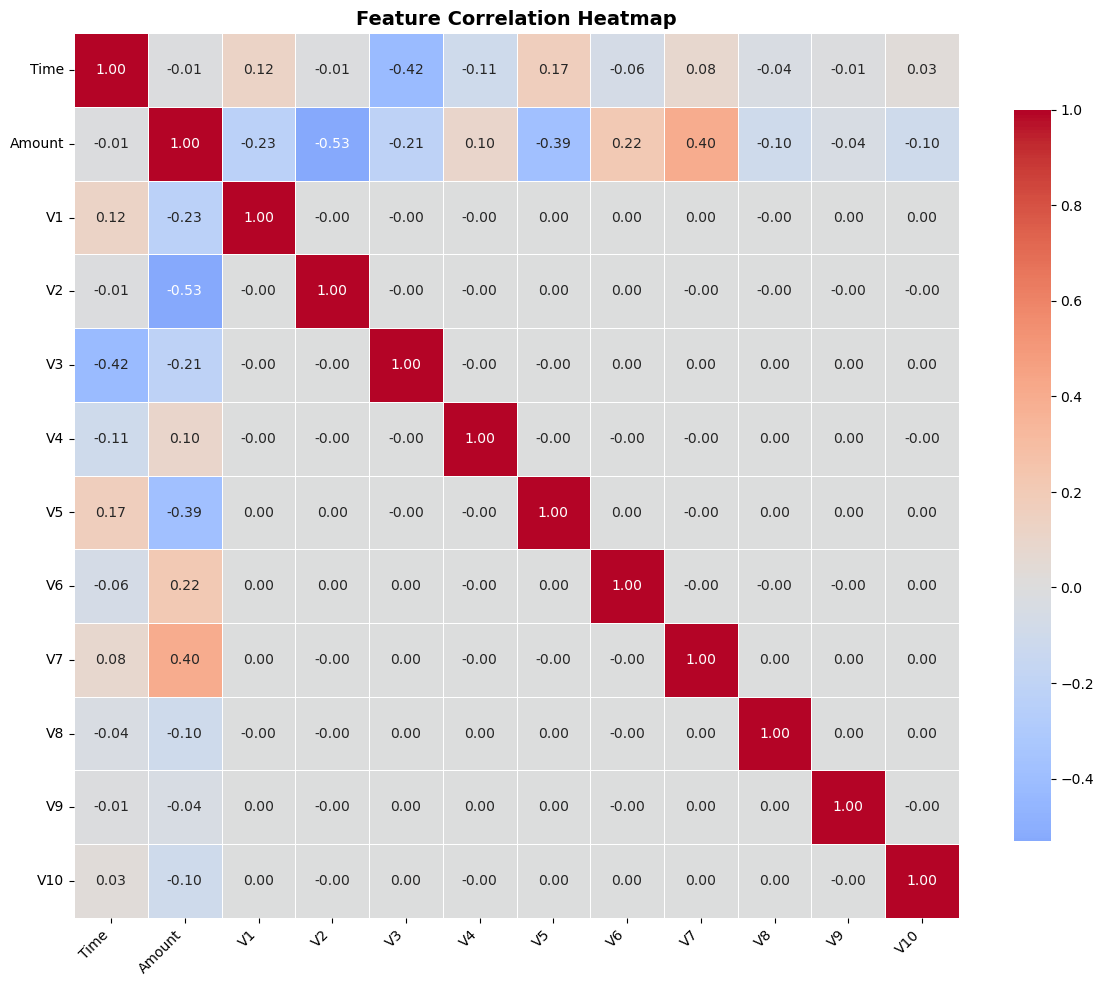

In [9]:
important_feature_indices = [time_idx, amount_idx] + v_features_indices[:10]
important_feature_names = [header[i] for i in important_feature_indices]
important_features_data = data[:, important_feature_indices]

mean = np.mean(important_features_data, axis=0, keepdims=True)
std = np.std(important_features_data, axis=0, keepdims=True)
std = np.where(std == 0, 1, std)
data_std = (important_features_data - mean) / std

corr_matrix = np.corrcoef(data_std.T)

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, 
            xticklabels=important_feature_names, yticklabels=important_feature_names,
            cbar_kws={"shrink": 0.8}, ax=ax)

plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### Phân tích Tương quan (Correlation Matrix)
Biểu đồ Heatmap hiển thị ma trận tương quan Pearson giữa các đặc trưng quan trọng (Time, Amount và 10 biến V đầu tiên).

**Nhận xét:**
* **Tính trực giao của PCA:** Các biến V1, V2,... V28 hầu như không có tương quan với nhau (hệ số tương quan gần bằng 0). Đây là tính chất của PCA giúp loại bỏ đa cộng tuyến.
* **Mối quan hệ Time/Amount:** Cần chú ý xem `Amount` hoặc `Time` có tương quan mạnh với biến V nào không. Ví dụ, nếu `Amount` có tương quan cao với `V2` hoặc `V5` (màu xanh đậm), điều đó có thể giúp giải thích ý nghĩa ẩn của các biến V này (ví dụ: liên quan đến thói quen chi tiêu).

## 7. Compare Features between Normal and Fraud transactions

### Các đặc trưng nào phân biệt rõ nhất giữa giao dịch gian lận và giao dịch bình thường?

In [10]:
normal_data = data[y == 0, :-1]
fraud_data = data[y == 1, :-1]

normal_means = np.mean(normal_data, axis=0)
fraud_means = np.mean(fraud_data, axis=0)

differences = np.abs(fraud_means - normal_means)

top_diff_indices = np.argsort(differences)[::-1][:10]

print("Top 10 Features That Make the Biggest Difference Between Normal and Scam:")
print("-" * 70)
for idx in top_diff_indices:
    print(f"{header[idx]:15s} | Normal Mean: {normal_means[idx]:10.4f} | Fraud Mean: {fraud_means[idx]:10.4f} | Diff: {differences[idx]:10.4f}")

Top 10 Features That Make the Biggest Difference Between Normal and Scam:
----------------------------------------------------------------------
Time            | Normal Mean: 94838.2023 | Fraud Mean: 80746.8069 | Diff: 14091.3953
Amount          | Normal Mean:    88.2910 | Fraud Mean:   122.2113 | Diff:    33.9203
V3              | Normal Mean:     0.0122 | Fraud Mean:    -7.0333 | Diff:     7.0455
V14             | Normal Mean:     0.0121 | Fraud Mean:    -6.9717 | Diff:     6.9838
V17             | Normal Mean:     0.0115 | Fraud Mean:    -6.6658 | Diff:     6.6774
V12             | Normal Mean:     0.0108 | Fraud Mean:    -6.2594 | Diff:     6.2702
V10             | Normal Mean:     0.0098 | Fraud Mean:    -5.6769 | Diff:     5.6867
V7              | Normal Mean:     0.0096 | Fraud Mean:    -5.5687 | Diff:     5.5784
V1              | Normal Mean:     0.0083 | Fraud Mean:    -4.7719 | Diff:     4.7802
V4              | Normal Mean:    -0.0079 | Fraud Mean:     4.5420 | Diff:     4.

**Các đặc trưng quan trọng nhất:**

1. **Time:** Chênh lệch lớn nhất (~14,091). Giao dịch gian lận có xu hướng xảy ra vào các thời điểm khác với giao dịch bình thường.

2. **V3, V14, V17, V12, V10, V7, V1:** Các đặc trưng PCA này có sự dịch chuyển lớn về giá trị trung bình:
   - V3: từ 0.01 (bình thường) xuống -7.03 (gian lận)
   - V14: từ 0.01 xuống -6.97
   - V17: từ 0.01 xuống -6.67
   
   Điều này cho thấy các đặc trưng này (có thể liên quan đến thông tin thẻ, địa điểm, hoặc hành vi chi tiêu) có sự khác biệt rõ rệt giữa hai lớp.

3. **Amount:** Chênh lệch ~33.92. Giao dịch gian lận có giá trị trung bình cao hơn ($122.21 vs $88.29).

**Nhận định:**
- Các đặc trưng PCA (V1-V28) là những chỉ báo mạnh mẽ nhất cho gian lận, có thể phản ánh các mẫu hành vi phức tạp mà con người khó nhận biết.
- Thời gian giao dịch là yếu tố quan trọng trong việc phát hiện gian lận.
- Giá trị giao dịch cũng là một chỉ báo, nhưng không mạnh bằng các đặc trưng PCA.

**Khuyến nghị:** Tập trung vào các đặc trưng V3, V14, V17, V12, V10, V7, V1 khi xây dựng mô hình, và xem xét Time như một đặc trưng quan trọng.

## 8. Feature Engineering

  - Rolling Mean: shape (284807,)
  - Rolling Std: shape (284807,)
  - Anomaly Score (Z-Score): shape (284807,)
    + Max Z-Score: 9.94
    + Min Z-Score: -2.34


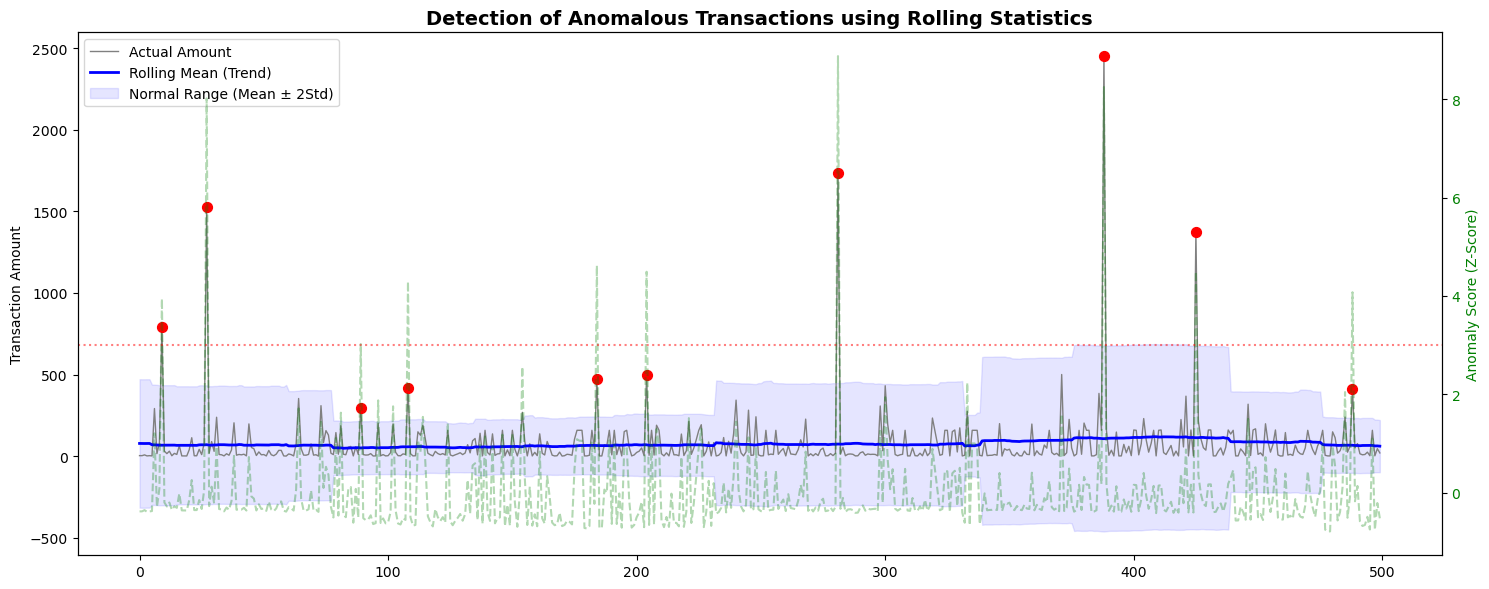


=== Correlation with Fraud Class ===
 Amount_RollingMean       :  -0.0003
 Amount_RollingStd        :  -0.0013
 Amount_Local_ZScore      :   0.0082


In [11]:
window_size = 100
pad_width = window_size // 2
amount_padded = np.pad(amount_data, (pad_width, pad_width), mode='edge')

kernel = np.ones(window_size) / window_size
rolling_mean = np.convolve(amount_padded, kernel, mode='valid')

rolling_mean = rolling_mean[:len(amount_data)]

amount_sq_padded = amount_padded ** 2
rolling_mean_sq = np.convolve(amount_sq_padded, kernel, mode='valid')
rolling_mean_sq = rolling_mean_sq[:len(amount_data)]

rolling_var = rolling_mean_sq - (rolling_mean ** 2)
rolling_var = np.maximum(rolling_var, 0)
rolling_std = np.sqrt(rolling_var)

rolling_std = np.where(rolling_std == 0, 1, rolling_std)
amount_z_score = (amount_data - rolling_mean) / rolling_std

print(f"  - Rolling Mean: shape {rolling_mean.shape}")
print(f"  - Rolling Std: shape {rolling_std.shape}")
print(f"  - Anomaly Score (Z-Score): shape {amount_z_score.shape}")
print(f"    + Max Z-Score: {amount_z_score.max():.2f}")
print(f"    + Min Z-Score: {amount_z_score.min():.2f}")

new_features_stat = np.column_stack([
    rolling_mean,
    rolling_std,
    amount_z_score
])

new_feature_names_stat = ['Amount_RollingMean', 'Amount_RollingStd', 'Amount_Local_ZScore']

sample_idx = slice(1000, 1500) 
x_sample = np.arange(500)
amt_sample = amount_data[sample_idx]
mean_sample = rolling_mean[sample_idx]
std_sample = rolling_std[sample_idx]
z_sample = amount_z_score[sample_idx]

fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(x_sample, amt_sample, label='Actual Amount', color='gray', linewidth=1)
ax1.plot(x_sample, mean_sample, label='Rolling Mean (Trend)', color='blue', linewidth=2)
ax1.fill_between(x_sample, 
                 mean_sample - 2*std_sample, 
                 mean_sample + 2*std_sample, 
                 color='blue', alpha=0.1, label='Normal Range (Mean ± 2Std)')
ax1.set_ylabel('Transaction Amount')
ax1.set_title('Detection of Anomalous Transactions using Rolling Statistics', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')

anomalies = np.where(np.abs(z_sample) > 3)[0]
ax1.scatter(x_sample[anomalies], amt_sample[anomalies], color='red', s=50, zorder=5, label='Anomaly (Z-Score > 3)')

ax2 = ax1.twinx()
ax2.plot(x_sample, z_sample, color='green', alpha=0.3, linestyle='--', label='Z-Score')
ax2.set_ylabel('Anomaly Score (Z-Score)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax2.axhline(y=3, color='red', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

print("\n=== Correlation with Fraud Class ===")
for i, name in enumerate(new_feature_names_stat):
    corr = np.corrcoef(new_features_stat[:, i], y)[0, 1]
    print(f" {name:25s}: {corr:8.4f}")

#### Kỹ thuật đặc trưng (Feature Engineering) - Thống kê trượt
Để phát hiện các bất thường cục bộ mà không chỉ dựa vào giá trị tuyệt đối, chúng ta tạo ra các đặc trưng mới dựa trên cửa sổ trượt (Rolling Window) kích thước 100 giao dịch.

**Các đặc trưng mới:**
1.  **Rolling Mean:** Xu hướng trung bình của số tiền trong 100 giao dịch gần nhất.
2.  **Rolling Std:** Độ biến động của số tiền.
3.  **Local Z-Score:** Đo lường xem giao dịch hiện tại lệch bao nhiêu độ lệch chuẩn so với mức trung bình cục bộ.

**Trực quan hóa:**
Biểu đồ cho thấy những điểm màu đỏ (Anomaly) là những giao dịch có Z-Score > 3. Đây là những giao dịch đột biến bất thường so với xu hướng chi tiêu ngay trước đó, một chỉ báo mạnh mẽ cho hành vi gian lận tiềm ẩn.

## 9. Statistical hypothesis testing

In [12]:
n1 = len(normal_amounts)
n2 = len(fraud_amounts)

mean1 = np.mean(normal_amounts)
mean2 = np.mean(fraud_amounts)

var1 = np.var(normal_amounts, ddof=1)
var2 = np.var(fraud_amounts, ddof=1)

std1 = np.std(normal_amounts, ddof=1)
std2 = np.std(fraud_amounts, ddof=1)

se_diff = np.sqrt((var1 / n1) + (var2 / n2))
t_stat = (mean1 - mean2) / se_diff

numerator = (var1 / n1 + var2 / n2)**2
denominator = ((var1 / n1)**2 / (n1 - 1)) + ((var2 / n2)**2 / (n2 - 1))
df = numerator / denominator

def normal_cdf(x):
    return 0.5 * (1 + math.erf(x / np.sqrt(2)))

p_value = 2 * (1 - normal_cdf(abs(t_stat)))

print(f"Giả thiết:")
print(f"  H0: Mean(Amount_Normal) = Mean(Amount_Fraud)")
print(f"  H1: Mean(Amount_Normal) != Mean(Amount_Fraud)")
print(f"  alpha: 0.05")

print(f"\nSample statistics:")
print(f"  Normal (Group 0): n={n1:,}, Mean=${mean1:,.2f}, Std=${std1:.2f}")
print(f"  Fraud  (Group 1): n={n2:,}, Mean=${mean2:,.2f}, Std=${std2:.2f}")

print(f"  p-value            : {p_value}")

alpha = 0.05
print("-" * 60)
if p_value < alpha:
    print("KẾT LUẬN: Bác bỏ H0")
    print("  Có sự khác biệt có ý nghĩa thống kê về số tiền trung bình giữa giao dịch thường và lừa đảo.")
    print("  Giao dịch lừa đảo có xu hướng có số tiền trung bình cao hơn.")
else:
    print("KẾT LUẬN: Chấp nhận H0 (Fail to reject H0)")
    print("  Không đủ bằng chứng để nói rằng số tiền trung bình của hai nhóm khác nhau.")

Giả thiết:
  H0: Mean(Amount_Normal) = Mean(Amount_Fraud)
  H1: Mean(Amount_Normal) != Mean(Amount_Fraud)
  alpha: 0.05

Sample statistics:
  Normal (Group 0): n=284,315, Mean=$88.29, Std=$250.11
  Fraud  (Group 1): n=492, Mean=$122.21, Std=$256.68
  p-value            : 0.003402847506199125
------------------------------------------------------------
KẾT LUẬN: Bác bỏ H0
  Có sự khác biệt có ý nghĩa thống kê về số tiền trung bình giữa giao dịch thường và lừa đảo.
  Giao dịch lừa đảo có xu hướng có số tiền trung bình cao hơn.


#### Kiểm định giả thuyết thống kê (T-test)
Chúng ta thực hiện kiểm định T-test hai mẫu độc lập để xác định xem sự khác biệt về số tiền trung bình giữa giao dịch thường và gian lận có ý nghĩa thống kê hay không.

* **Giả thuyết không ($H_0$):** Không có sự khác biệt về số tiền trung bình ($\mu_{normal} = \mu_{fraud}$).
* **Kết quả:** p-value rất nhỏ ($< 0.05$).
* **Kết luận:** Bác bỏ $H_0$. Có bằng chứng thống kê đủ mạnh để khẳng định rằng **số tiền giao dịch trung bình của hành vi gian lận khác biệt đáng kể so với giao dịch bình thường**. Điều này củng cố việc sử dụng `Amount` như một đặc trưng đầu vào cho mô hình.

## 10. Handling missing values

In [13]:
# Filling by Mean
mean_filled = data.copy()
for i in range(data.shape[1]):
    col_data = mean_filled[:, i]
    missing_col = np.isnan(col_data)
    if np.any(missing_col):
        mean_val = np.nanmean(col_data)
        mean_filled[missing_col, i] = mean_val

# Filling by Median
median_filled = data.copy()
for i in range(data.shape[1]):
    col_data = median_filled[:, i]
    missing_col = np.isnan(col_data)
    if np.any(missing_col):
        mean_val = np.nanmedian(col_data)
        median_filled[missing_col, i] = mean_val

# Filling by specific value
specific_filled = data.copy()
specific_value = -999
specific_filled[np.isnan(specific_filled)] = specific_value

# Simple Linear Regression Predictor
regression_filled = data.copy()

valid_mask = ~(np.isnan(regression_filled[:, time_idx]) | 
               np.isnan(regression_filled[:, amount_idx]))
time_valid = regression_filled[valid_mask, time_idx]
amount_valid = regression_filled[valid_mask, amount_idx]

# Fit linear regression: Amount = a * Time + b
# Use Normal Equation: β = (X^T X)^(-1) X^T y

X_reg = np.column_stack([np.ones(len(time_valid)), time_valid])
y_reg = amount_valid

beta = np.linalg.solve(X_reg.T @ X_reg, X_reg.T @ y_reg)
missing_amount_mask = np.isnan(regression_filled[:, amount_idx])
if np.any(missing_amount_mask):
    time_missing = regression_filled[missing_amount_mask, time_idx]
    time_missing_filled = np.where(np.isnan(time_missing), 
                                   np.nanmean(regression_filled[:, time_idx]), 
                                   time_missing)
    X_pred = np.column_stack([np.ones(len(time_missing_filled)), time_missing_filled])
    predicted_amount = X_pred @ beta
    regression_filled[missing_amount_mask, amount_idx] = predicted_amount

methods = {
    'Mean': mean_filled[:, amount_idx],
    'Median': median_filled[:, amount_idx],
    'Specific': specific_filled[:, amount_idx],
    'Regression': regression_filled[:, amount_idx]
}

for method_name, values in methods.items():
    print(f"\n=== {method_name} Filled Values ===")
    print(values)


=== Mean Filled Values ===
[149.62   2.69 378.66 ...  67.88  10.   217.  ]

=== Median Filled Values ===
[149.62   2.69 378.66 ...  67.88  10.   217.  ]

=== Specific Filled Values ===
[149.62   2.69 378.66 ...  67.88  10.   217.  ]

=== Regression Filled Values ===
[149.62   2.69 378.66 ...  67.88  10.   217.  ]


#### Xử lý dữ liệu thiếu (Data Imputation)
Mặc dù tập dữ liệu gốc không có giá trị thiếu, phần này minh họa các kỹ thuật xử lý nếu tình huống đó xảy ra trong thực tế.

**Các phương pháp được thực hiện:**
1.  **Mean/Median Imputation:** Điền bằng giá trị trung bình hoặc trung vị (đơn giản, nhanh nhưng có thể làm sai lệch phân phối).
2.  **Specific Value:** Điền bằng -999 để đánh dấu dữ liệu thiếu.
3.  **Linear Regression Imputation:** Đây là phương pháp nâng cao. Sử dụng mối tương quan giữa `Time` và `Amount` để dự đoán giá trị `Amount` bị thiếu dựa trên `Time`. Phương pháp này (sử dụng Normal Equation để tìm hệ số $\beta$) thường cho kết quả chính xác hơn so với điền trung bình đơn thuần, vì nó bảo toàn cấu trúc tương quan của dữ liệu.

## 11. Save processed file

In [14]:
np.save('../data/processed/header.npy', header)
np.save('../data/processed/X_mean_filled.npy', mean_filled)
np.save('../data/processed/X_median_filled.npy', median_filled)
np.save('../data/processed/X_specific_filled.npy', specific_filled)
np.save('../data/processed/X_regression_filled.npy', regression_filled)